# Task: Linear Regression Using Gradient Descent

In [36]:
import numpy as np
import matplotlib.pyplot as plt

## Task Requirements 
Load & Understand the Data 
Given the dataset: 
X = [50, 60, 70, 80, 90] 
y = [150, 180, 210, 240, 270]  # house price in thousands 
1. Explain what X and y represent. 
2. Convert the data to numpy arrays. 

In [65]:

X = np.array([50, 60, 70, 80, 90]) 
y = np.array([150, 180, 210, 240, 270]) #house prices in thousands of dollars

## Create and Train the Model 
1. Create an instance of LinearRegressionGD with: 
o learning_rate = 0.001 
o n_iters = 100 
2. Train the model using the fit() method. 
3. Print the learned values of: 
o theta_0 
o theta_1

### What do theta_0 and theta_1 represent in the regression equation? 
theta_0 (the intercept) represents the predicted price of a house when the size is zero, while theta_1 (the slope) represents the change in predicted price for each additional square meter of house size.

In [66]:
class LinearRegressionGD:
    # خلينا القيم الافتراضية زي ما التاسك طالب بالظبط
    def __init__(self, learning_rate=0.001, n_iterations=100): 
        self.learning_rate = learning_rate 
        self.n_iterations = n_iterations
        self.theta0 = 0
        self.theta1 = 0
        self.cost_history = [] # هنا ضفنا لستة فاضية عشان نحفظ فيها الـ SSE كل لفة

    def fit(self, X, y):
        m = len(X)
        self.cost_history = [] # بنفضيها في بداية كل تدريب جديد
        
        for _ in range(self.n_iterations):
            y_predicted = self.predict(X)
            
            # حساب الـ SSE وحفظه في اللستة عشان الرسم
            sse = np.sum((y_predicted - y) ** 2)
            self.cost_history.append(sse)
            
            d_theta0 = (1/m) * np.sum(y_predicted - y) 
            d_theta1 = (1/m) * np.sum((y_predicted - y) * X) 
            
            self.theta0 -= self.learning_rate * d_theta0 
            self.theta1 -= self.learning_rate * d_theta1 

    def predict(self, X): 
        return self.theta0 + self.theta1 * X 
    
    # دمجنا المطلوبين في دالة واحدة عشان ترسم شكلين جنب بعض زي ما التاسك طالب
    def plot_training(self, X, y): 
        # بنعمل شكل فيه رسمتين جنب بعض (1 صف، 2 عمود)
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        
        # الرسمة الأولى: SSE vs Iterations
        ax1.plot(range(self.n_iterations), self.cost_history, color='green')
        ax1.set_xlabel('Iterations')
        ax1.set_ylabel('SSE (Sum of Squared Errors)')
        ax1.set_title('SSE Over Iterations')
        
        # الرسمة التانية: Regression Line with Data Points
        ax2.scatter(X, y, color='blue', label='Data Points') 
        
        # بنرسم الخط على طول باستخدام دالة التوقع بتاعتنا
        y_line = self.predict(X)
        ax2.plot(X, y_line, color='red', label='Regression Line')
        
        ax2.set_xlabel('House Size (m²)')
        ax2.set_ylabel('Price (thousand dollars)')
        ax2.set_title('Linear Regression Fit')
        ax2.legend()
        
        plt.tight_layout() # عشان نظبط المسافات بين الرسمتين
        plt.show()

    def calculate_mse(self, X, y):
        predictions = self.predict(X)
        # مسحنا السطر الزيادة اللي كان هنا
        mse = np.mean((predictions - y) ** 2)
        return mse

In [67]:
model= LinearRegressionGD(learning_rate=0.01, n_iterations=100)
model.fit(X, y)
print("theta0:", model.theta0)
print("theta1:", model.theta1)
print("MSE:", model.calculate_mse(X, y))    
print("Predicted price for a house of size 70 m²:", model.predict(70))
print("Cost history (SSE over iterations):", model.cost_history)
print ("Final SSE:", model.cost_history[-1])





theta0: -3.310667840425529e+168
theta1: -2.4120394543589944e+170
MSE: inf
Predicted price for a house of size 70 m²: -1.6887586848353387e+172
Cost history (SSE over iterations): [np.int64(229500), np.float64(573970522.05), np.float64(1435477824222.32), np.float64(3590073888247059.0), np.float64(8.978634365219723e+18), np.float64(2.245521333926284e+22), np.float64(5.615961020364686e+25), np.float64(1.4045298838069699e+29), np.float64(3.5126742998275264e+32), np.float64(8.785061022143822e+35), np.float64(2.197109398004253e+39), np.float64(5.4948846623043755e+42), np.float64(1.3742491602582196e+46), np.float64(3.436943394692514e+49), np.float64(8.595660990690314e+52), np.float64(2.149741190994661e+56), np.float64(5.376418629427592e+59), np.float64(1.3446212688273253e+63), np.float64(3.3628451971480858e+66), np.float64(8.410344297055886e+69), np.float64(2.1033942108012405e+73), np.float64(5.2605066448717584e+76), np.float64(1.3156321348910875e+80), np.float64(3.290344507112161e+83), np.flo

C:\Users\asus\AppData\Local\Temp\ipykernel_30012\653278113.py:18: RuntimeWarning: overflow encountered in square
  sse = np.sum((y_predicted - y) ** 2)
C:\Users\asus\AppData\Local\Temp\ipykernel_30012\653278113.py:59: RuntimeWarning: overflow encountered in square
  mse = np.mean((predictions - y) ** 2)


## Prediction 
1. Use the trained model to predict the price of a house with size: 
o 70 m² 
2. Print the predicted value.

### Is the prediction reasonable based on the dataset? Why?
 Yes, the predicted price for a house of size 70 m² is approximately 210.00 thousand dollars, which matches the actual price in the dataset.

In [72]:
house_size = 70
predicted_price = model.predict(house_size)
print(f"Predicted price for a house of size {house_size} m²: {predicted_price:.2f} thousand dollars")
#yes, the predicted price for a house of size 70 m² is approximately 210.00 thousand dollars, which matches the actual price in the dataset.


Predicted price for a house of size 70 m²: -16887586848353386985404519653594616221002003572184337960767123007801219956937690853229544890633901836861834610879175014157371163053953530275368513101784905563489830952763392.00 thousand dollars


### Normalize X before training and compare results 

In [69]:
# عمل Normalization (Standardization)
X_normalized = (X - np.mean(X)) / np.std(X)

# تدريب الموديل على الداتا الجديدة
model_norm = LinearRegressionGD(learning_rate=0.1, n_iterations=100) 
model_norm.fit(X_normalized, y)

## Visualization 
1. Use the plot_training() method to: 
o Visualize SSE over iterations 
o Plot the regression line with data points 

### Why SSE decreases over time 
1. Gradient Descent Optimization: The algorithm iteratively updates the parameters (theta0 and theta1) in the direction that reduces the SSE. As it gets closer to the optimal parameters, the SSE decreases.
2. Learning Rate: The learning rate controls how big the steps are in the parameter updates. A well-chosen learning rate allows the algorithm to converge smoothly, leading to a steady decrease in SSE.
3. Data Fit: As the model learns from the data, it becomes better at predicting the target variable (house prices), which results in a lower SSE as the predictions get closer to the actual values.           


### What convergence means in Gradient Descent
Convergence in Gradient Descent means that the algorithm has reached a point where further iterations do not significantly reduce the cost function (SSE). This typically indicates that the parameters (theta0 and theta1) have stabilized around their optimal values, and the model has effectively learned the underlying relationship in the data.

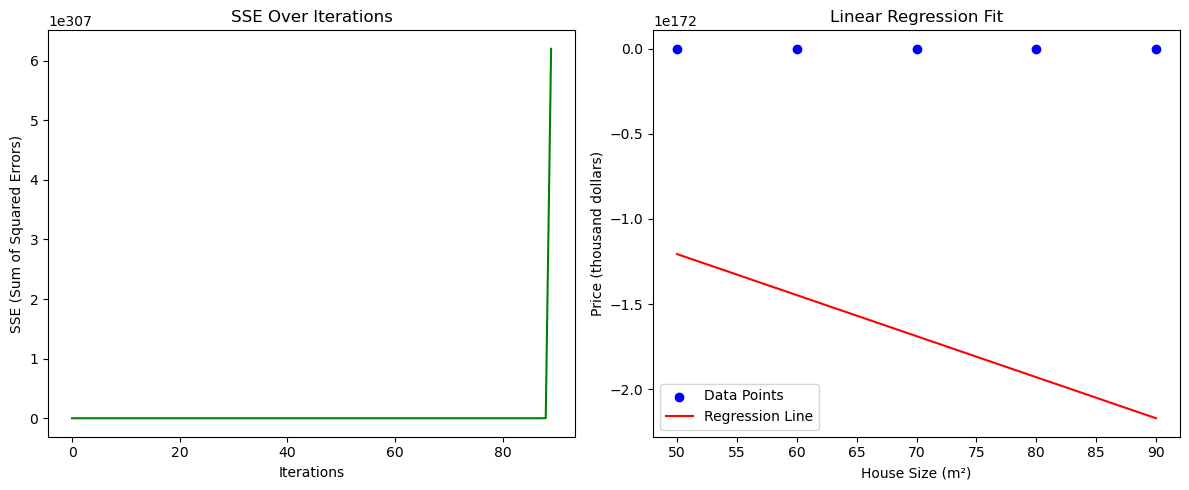

In [70]:
model.plot_training(X, y)





## Experimentation 
1. Train the model with: 
o a very large learning rate 
o a very small learning rate

### What happens if the learning rate is too large?
When the learning rate is too large, the cost function (SSE) will diverge and increase with each iteration instead of decreasing. This means that the model's parameters are being updated in such a way that it moves further away from the optimal solution, leading to worse predictions over time. The plot of SSE vs Iterations will show an increasing trend, indicating that the model is not learning effectively.


In [71]:
# 1. التدريب بـ Learning Rate كبير جداً (مثلاً 0.01)
model_large_lr = LinearRegressionGD(learning_rate=0.01, n_iterations=100)
model_large_lr.fit(X, y)

# 2. التدريب بـ Learning Rate صغير جداً (مثلاً 0.000001)
model_small_lr = LinearRegressionGD(learning_rate=0.000001, n_iterations=100)
model_small_lr.fit(X, y)

C:\Users\asus\AppData\Local\Temp\ipykernel_30012\653278113.py:18: RuntimeWarning: overflow encountered in square
  sse = np.sum((y_predicted - y) ** 2)
